## 11장. 시계열 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style='whitegrid', palette="pastel")

In [2]:
## datetime 패키지 가져오기
from datetime import datetime

In [3]:
## 현재 연월일시 가져오기 
datetime.now()

datetime.datetime(2020, 3, 2, 18, 13, 21, 608569)

In [5]:
## 현재 연월일시를 가져와서, 연/월/일/시/분/초.... 구분하기 
now = datetime.now()
print(now.year)
print(now.month)
print(now.day)
print(now.hour)
print(now.minute)
print(now.second)

2020
3
2
18
15
19


In [16]:
## 시간계산을 간단하게 할 수있음, 시작 & 종료일간의 경과 일자/초 구하기 
start_day = datetime(2019, 3, 1, 9, 30)
end_day = datetime(2020, 2, 8, 18, 0)

delta = end_day - start_day

print(delta.days)
print(delta.seconds)

344
30600


##### < 문자열을 timestamp 포맷으로 변경하기 >
##### - (연-월-일-시-분-초)   %Y - %m - %d - %H - %M - %S
##### - %F : %Y - %m - %d (ex. 2020-3-2) 
##### - %D : %m / %d / %y (ex. 03/02/20)    ~ 소문자 y는 연도를 두자리수로 표시함 

In [18]:
stamp = datetime(2020, 3, 2)
str(stamp)

'2020-03-02 00:00:00'

In [19]:
#### strftime (str format time)으로 날째 포맷 지정하기 
stamp.strftime('%Y-%m-%d')

'2020-03-02'

In [24]:
#### 문자열을 날짜포맷으로 변경시, datetime.strptime(str parsing time)을 많이 쓴다. 
datetime.strptime('2019-12-25', '%Y-%m-%d')

datetime.datetime(2019, 12, 25, 0, 0)

In [25]:
#### parser 명령은 포맷지정 없이도 어지간한 형태는 자동으로 날짜형태로 만들어 준다. 
from dateutil.parser import parse
parse('2018-05-12')

datetime.datetime(2018, 5, 12, 0, 0)

In [29]:
d = parse('Jan 31, 1998 11:45 AM')
str(d)

'1998-01-31 11:45:00'

In [30]:
d2 = parse('06/12/2000', dayfirst=True)  ### 날짜가 앞에오는 경우 dayfirst=True 옵션 사용 
str(d2)

'2000-12-06 00:00:00'

In [31]:
#### pandas.to_datetime : 판다스로 문자열들을 날짜 포맷으로 변경 
dates = ['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05', '2020-10-06']
dates

['2020-10-01',
 '2020-10-02',
 '2020-10-03',
 '2020-10-04',
 '2020-10-05',
 '2020-10-06']

In [32]:
dates_F = pd.to_datetime(dates)
dates_F

DatetimeIndex(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', freq=None)

In [36]:
## date range 만들기 ~ freq = 'D', 'H', 'min', 'S' ... 
index1 = pd.date_range('2020-01-01', '2020-02-29')                      #### 기간내 1일 단위로 time index 생성 
index2 = pd.date_range(start ='2020-01-01', periods = 15, freq='H')     #### 시작일로부터 15시간의 time index 생성 
index3 = pd.date_range(end = '2020-01-01', periods = 10, freq='min')    #### 종료일까지 10분간의 time index 생성 

#index1
index2
#index3

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               '2020-01-01 10:00:00', '2020-01-01 11:00:00',
               '2020-01-01 12:00:00', '2020-01-01 13:00:00',
               '2020-01-01 14:00:00'],
              dtype='datetime64[ns]', freq='H')

In [37]:
#### practice 

In [41]:
df = pd.read_csv('examples/stock_px.csv', )
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 10 columns):
DATE    5472 non-null object
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: float64(9), object(1)
memory usage: 427.6+ KB
None


,DATE,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
0,1990-02-01 0:00,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1,1990-02-02 0:00,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
2,1990-02-05 0:00,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
3,1990-02-06 0:00,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
4,1990-02-07 0:00,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [43]:
#### DATE 컬럼이 ojt 타입이라, date 타입으로 변환해준다. 
df.DATE = pd.to_datetime(df.DATE)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 10 columns):
DATE    5472 non-null datetime64[ns]
AA      5472 non-null float64
AAPL    5472 non-null float64
GE      5472 non-null float64
IBM     5472 non-null float64
JNJ     5472 non-null float64
MSFT    5472 non-null float64
PEP     5471 non-null float64
SPX     5472 non-null float64
XOM     5472 non-null float64
dtypes: datetime64[ns](1), float64(9)
memory usage: 427.6 KB


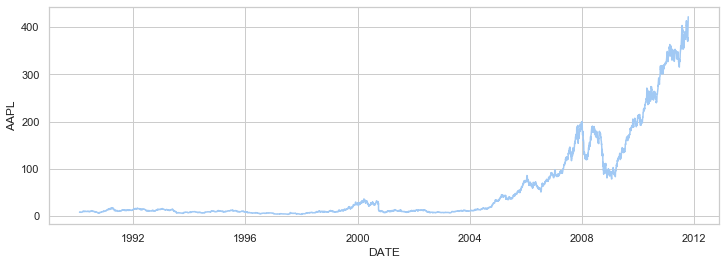

In [48]:
plt.figure(figsize = (12,4))
sns.lineplot(data=df, x='DATE', y='AAPL')